In [ ]:
!unzip '/content/drive/MyDrive/data.zip' -d '/content/drive/MyDrive/data'

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/data/data/validation/fear/9040.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9101.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/911.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9179.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9205.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9232.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9251.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9261.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9281.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9302.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9333.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9369.jpg  
 extracting: /content/drive/MyDrive/data/data/validation/fear/9370.jpg  
 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

IMG_HEIGHT=48
IMG_WIDTH=48
batch_size=32

train_data_dir='/content/drive/MyDrive/data/data/train/'
validation_data_dir='/content/drive/MyDrive/data/data/validation/'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
img, label = train_generator.__next__()






Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

28821
7066
Epoch 1/100
900/900 [==============================] - 124s 124ms/step - loss: 1.7732 - accuracy: 0.2658 - val_loss: 1.6906 - val_accuracy: 0.3180
Epoch 2/100
900/900 [==============================] - 106s 118ms/step - loss: 1.6564 - accuracy: 0.3380 - val_loss: 1.5064 - val_accuracy: 0.4161
Epoch 3/100
900/900 [==============================] - 105s 117ms/step - loss: 1.5337 - accuracy: 0.4018 - val_loss: 1.3571 - val_accuracy: 0.4805
Epoch 4/100
900/900 [==============================] - 107s 118ms/step - loss: 1.4431 - accuracy: 0.4376 - val_loss: 1.2816 - val_accuracy: 0.5045
Epoch 5/100
900/900 [==============================] - 105s 117ms/step - loss: 1.3819 - accuracy: 0.4661 - val_loss: 1.2343 - val_accuracy: 0.5337
Epoch 6/100
900/900 [==============================] - 104s 116ms/step - loss: 1.3416 - accuracy: 0.4873 - val_loss: 1.1774 - val_accuracy: 0.5548
Epoch 7/100
900/900 [==============================] - 105s 117ms/step - loss: 1.3032 - accuracy: 0.4993 - 

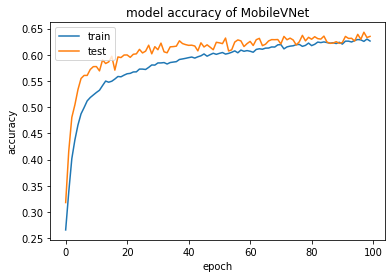

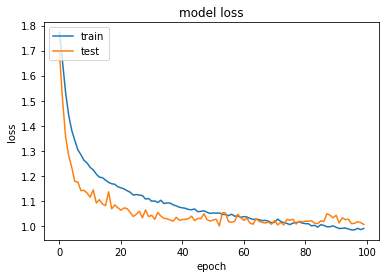

In [ ]:
train_path = "/content/drive/MyDrive/data/data/train"
test_path = "/content/drive/MyDrive/data/data/validation"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print(num_train_imgs)
print(num_test_imgs)
epochs=100

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('/content/drive/MyDrive/data/model_file.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of MobileVNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


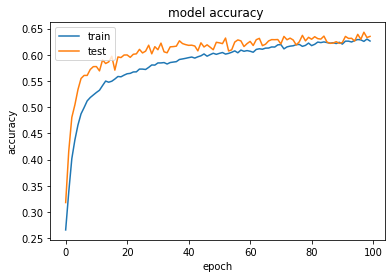

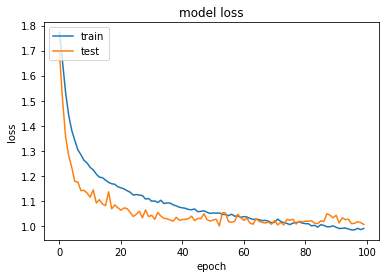

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()